In [69]:
from getpass import getpass

In [70]:
from mattermostdriver import Driver

foo = Driver({'url': 'cctb-intern.biologie.uni-wuerzburg.de', 'token': getpass("Token: "), 'port': 443})

In [71]:

"""
Most of the requests need you to be logged in, so calling login()
should be the first thing you do after you created your Driver instance.
login() returns the raw response.
If using a personal access token, you still need to run login().
In this case, does not make a login request, but a `get_user('me')`
and sets everything up in the client.
"""
foo.login()


{'id': '8gtq7te3ii8k3dat8gougi6ikh',
 'create_at': 1498818560044,
 'update_at': 1726558892303,
 'delete_at': 0,
 'username': 'iimog',
 'auth_data': '',
 'auth_service': '',
 'email': 'markus.ankenbrand@uni-wuerzburg.de',
 'email_verified': True,
 'nickname': '',
 'first_name': 'Markus',
 'last_name': 'Ankenbrand',
 'position': '',
 'roles': 'system_user',
 'allow_marketing': True,
 'props': {'customStatus': '{"emoji":"palm_tree","text":"On a vacation","duration":"date_and_time","expires_at":"2024-08-25T17:30:00Z"}',
  'last_search_pointer': '2'},
 'notify_props': {'channel': 'true',
  'comments': 'never',
  'desktop': 'all',
  'desktop_duration': '5',
  'desktop_sound': 'true',
  'email': 'false',
  'first_name': 'false',
  'mention_keys': 'iimog',
  'push': 'mention',
  'push_status': 'online',
  'user_id': '8gtq7te3ii8k3dat8gougi6ikh'},
 'last_password_update': 1499240959099,
 'last_picture_update': 1499243140269,
 'locale': 'en',
 'timezone': {'automaticTimezone': 'Europe/Berlin',
 

In [72]:
team = foo.teams.get_team_by_name('CCTB')

In [73]:
lunch = foo.channels.get_channel_by_name(channel_name='lunch', team_id=team['id'])
lunch

{'id': 'h3azbb4yejd69kg68kdmqiw53r',
 'create_at': 1499152209696,
 'update_at': 1689242463847,
 'delete_at': 0,
 'team_id': '4izweae3eigapetc3b4stqkgna',
 'type': 'O',
 'display_name': 'lunch',
 'name': 'lunch',
 'header': '[cooking](https://hackmd.io/PhOpF6VoQN2D9Mg6R3K9bQ?view) - [gather](https://gather.town/app/r4oLVM25VSqeXimY/CCTB)',
 'purpose': 'How to organize lunch :)',
 'last_post_at': 1726563736470,
 'total_msg_count': 6972,
 'extra_update_at': 1533632808244,
 'creator_id': '',
 'scheme_id': None,
 'props': None,
 'group_constrained': None,
 'shared': None,
 'total_msg_count_root': 7037,
 'policy_id': None,
 'last_root_post_at': 1726563736470}

In [74]:
import pandas as pd

In [75]:
lunch_users = pd.DataFrame(foo.channels.get_channel_members(channel_id=lunch['id']))

In [76]:
lunch_users.head()

,channel_id,user_id,roles,last_viewed_at,msg_count,mention_count,mention_count_root,urgent_mention_count,msg_count_root,notify_props,last_update_at,scheme_guest,scheme_user,scheme_admin,explicit_roles
0,h3azbb4yejd69kg68kdmqiw53r,eohdf9opcidx7cfpa5fuf8bfte,channel_user,1725958780125,6966,0,0,0,7031,"{'channel_auto_follow_threads': 'off', 'deskto...",1725958780125,False,True,False,
1,h3azbb4yejd69kg68kdmqiw53r,qnfgr4c4ojncfgtzcarrxe7zxr,channel_user,1726044660323,6966,0,0,0,7031,"{'channel_auto_follow_threads': 'off', 'deskto...",1726044660323,False,True,False,
2,h3azbb4yejd69kg68kdmqiw53r,sgo45qg6mtdpbr7myj1r9cfi1r,channel_user,1724922401125,6956,0,0,0,7021,"{'channel_auto_follow_threads': 'off', 'deskto...",1724922401125,False,True,False,
3,h3azbb4yejd69kg68kdmqiw53r,tx1yzeb9nt8nfxdhwubpg8r5jo,channel_user,0,0,1,0,0,0,"{'desktop': 'default', 'email': 'default', 'ma...",1500541982832,False,True,False,
4,h3azbb4yejd69kg68kdmqiw53r,gfi8bmr7s7ngxmiaoky85kq4mr,channel_user,1725958780125,6966,0,0,0,7031,"{'channel_auto_follow_threads': 'off', 'deskto...",1725958780125,False,True,False,


In [77]:
lunch_users.shape

(35, 15)

<AxesSubplot: xlabel='user_id'>

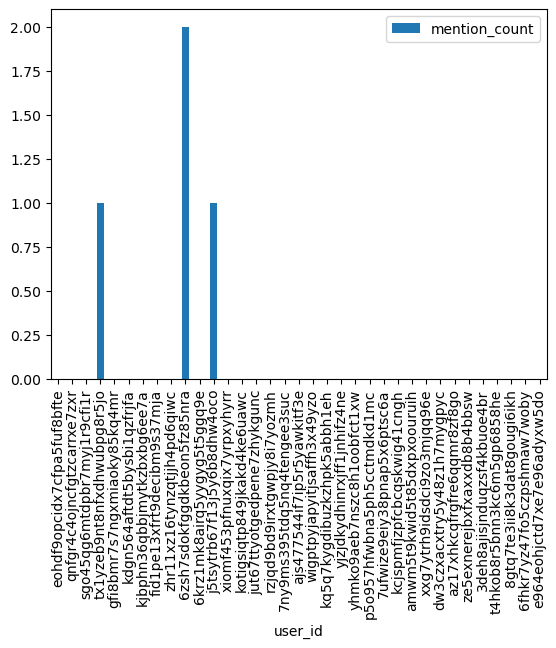

In [78]:
lunch_users.plot(kind='bar', x='user_id', y='mention_count')

In [79]:
foo.users.get_stats()

{'total_users_count': 447}

In [80]:
users = pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 0}))
users = pd.concat([users, pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 1}))])
users = pd.concat([users, pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 2}))])
users = pd.concat([users, pd.DataFrame(foo.users.get_users(params={'per_page': 200, 'page': 3}))])
users.drop(columns=['email'], inplace=True)

In [81]:
users.shape

(456, 20)

In [82]:
users = users.sort_values('create_at')

In [83]:
users.position.value_counts()

                               446
top floor, left                  1
IT Admin                         1
Bachelor Student                 1
Student                          1
Associate professor              1
PhD student                      1
Master Student @ AG Beliu        1
Master Student                   1
visitor                          1
some random biology student      1
Name: position, dtype: int64

In [84]:
foo.channels.get_channel_statistics(channel_id=lunch['id'])

{'channel_id': 'h3azbb4yejd69kg68kdmqiw53r',
 'member_count': 34,
 'guest_count': 0,
 'pinnedpost_count': 0,
 'files_count': 221}

In [85]:
lunch['total_msg_count']

6972

In [86]:
posts = foo.posts.get_posts_for_channel(channel_id=lunch['id'])

In [87]:
list(posts['posts'].values())[1]['metadata']['reactions']

[{'user_id': 't4hkob8r5bnn3kc6m5gp6858he',
  'post_id': '3krp8is4ob8axp5cr4115on59w',
  'emoji_name': 'pizza',
  'create_at': 1722328778525,
  'update_at': 1722328778525,
  'delete_at': 0,
  'remote_id': '',
  'channel_id': 'h3azbb4yejd69kg68kdmqiw53r'}]

In [88]:
#list(posts['posts'].values())[1]['metadata']['files'][0]

In [89]:
file = foo.files.get_file_preview(file_id='mqs611s1jfng7ywfhgewadedsy')

In [90]:
import base64
from PIL import Image
from io import BytesIO

In [91]:
def base64_to_image(base64_string):
    # Remove the data URI prefix if present
    if "data:image" in base64_string:
        base64_string = base64_string.split(",")[1]

    # Decode the Base64 string into bytes
    image_bytes = base64.b64decode(base64_string)
    return image_bytes

In [92]:
def create_image_from_bytes(image_bytes):
    # Create a BytesIO object to handle the image data
    image_stream = BytesIO(image_bytes)

    # Open the image using Pillow (PIL)
    image = Image.open(image_stream)
    return image

In [93]:
def show_image_from_file_id(file_id):
    file = foo.files.get_file_preview(file_id=file_id)
    image = create_image_from_bytes(file.content)
    return image

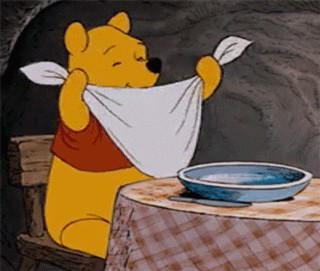

In [94]:
create_image_from_bytes(file.content)

In [95]:
#img_preview_b64 = list(posts['posts'].values())[1]['metadata']['files'][0]['mini_preview']

In [96]:
#create_image_from_bytes(base64_to_image(img_preview_b64))

In [97]:
lunch_posts = []
for i in range(lunch['total_msg_count'] // 200 + 2):
    lunch_posts.append(foo.posts.get_posts_for_channel(channel_id=lunch['id'], params={'per_page': 200, 'page': i}))

In [98]:
[len(x['posts']) for x in lunch_posts]

[200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 201,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 120]

In [99]:
lunch_posts_list = sum([list(x['posts'].values()) for x in lunch_posts], [])

In [100]:
len(lunch_posts_list)

7121

In [101]:
lp = pd.DataFrame(lunch_posts_list)
lp = lp.sort_values(by="create_at")
lp.head()

,id,create_at,update_at,edit_at,delete_at,is_pinned,user_id,channel_id,root_id,original_id,...,props,hashtags,pending_post_id,reply_count,last_reply_at,participants,metadata,file_ids,has_reactions,remote_id
7019,8nub7or8zfbkmpipx646q9rr9a,1462183322000,1462183322000,0,0,False,8gtq7te3ii8k3dat8gougi6ikh,h3azbb4yejd69kg68kdmqiw53r,,,...,{'username': 'iimog'},,,0,0,None,{},NaN,NaN,NaN
7018,8kbk3re5sjroi8bfnxai3m7s3o,1462183322000,1462183322000,0,0,False,xuzzcgkghb8nzj45w3q4mmuohe,h3azbb4yejd69kg68kdmqiw53r,,,...,{'username': 'greatfireball'},,,0,0,None,{},NaN,NaN,NaN
7059,kjy1uptj8jym7fzsr71qkd9y7c,1462183322000,1462183322000,0,0,False,xuzzcgkghb8nzj45w3q4mmuohe,h3azbb4yejd69kg68kdmqiw53r,,,...,{},,,0,0,None,{},NaN,NaN,NaN
7009,644cyj77kinubm5guf5wacwphe,1462183323000,1462183323000,0,0,False,zhcza6utdjbddq3tkcr9pwhunc,h3azbb4yejd69kg68kdmqiw53r,,,...,{'username': 'nterhoeven'},,,0,0,None,{},NaN,NaN,NaN
7045,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,1462183333000,0,0,False,xuzzcgkghb8nzj45w3q4mmuohe,h3azbb4yejd69kg68kdmqiw53r,,,...,{},,,0,0,None,{},NaN,NaN,NaN


In [102]:
lp.to_pickle("messages_df_raw.pkl")

In [103]:
lp.type.value_counts()

                         6947
system_join_channel       114
system_leave_channel       29
system_add_to_channel      27
system_header_change        3
system_purpose_change       1
Name: type, dtype: int64

In [104]:
lp.metadata[1]

{'files': [{'id': 'mqs611s1jfng7ywfhgewadedsy',
   'user_id': 'yhmko9aeb7nszc8h1oobfct1xw',
   'post_id': '1f77hkb68py5ukuzfdcw1j8mty',
   'channel_id': 'h3azbb4yejd69kg68kdmqiw53r',
   'create_at': 1715935775896,
   'update_at': 1715935775896,
   'delete_at': 0,
   'name': 'Lunch Winnie Pooh.gif',
   'extension': 'gif',
   'size': 917786,
   'mime_type': 'image/gif',
   'width': 320,
   'height': 271,
   'mini_preview': '/9j/2wCEAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRQBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFP/AABEIABAAEAMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEy

In [105]:
lp.columns

Index(['id', 'create_at', 'update_at', 'edit_at', 'delete_at', 'is_pinned',
       'user_id', 'channel_id', 'root_id', 'original_id', 'message', 'type',
       'props', 'hashtags', 'pending_post_id', 'reply_count', 'last_reply_at',
       'participants', 'metadata', 'file_ids', 'has_reactions', 'remote_id'],
      dtype='object')

In [106]:
lp[lp.type == ""].remote_id.value_counts()

    64
Name: remote_id, dtype: int64

In [107]:
lunch_messages = lp[lp.type == ""][["id", "create_at", "user_id", "message", "metadata", "file_ids"]]
lunch_messages

,id,create_at,user_id,message,metadata,file_ids
7045,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,xuzzcgkghb8nzj45w3q4mmuohe,Also ich habe etwas dabei,{},NaN
7083,rpwuii8hci8ezmn3d41u9d58fc,1462183382000,zhcza6utdjbddq3tkcr9pwhunc,ich gehe mir jetzt was holen,{},NaN
7035,e8bnwq8c7fdf5k7zpqyeihougr,1462183404000,xuzzcgkghb8nzj45w3q4mmuohe,Alles klar,{},NaN
7088,sku34dhpntdfdmc5d9ky9a9yso,1462184433000,xuzzcgkghb8nzj45w3q4mmuohe,Hallo @joerg,{},NaN
7047,hi38ssjpb3yqz88dk83tzjq5zr,1462184435000,xuzzcgkghb8nzj45w3q4mmuohe,Essen?,{},NaN
...,...,...,...,...,...,...
104,j6ju19pmdjni9y49fn5e4fr1py,1726215985921,yhmko9aeb7nszc8h1oobfct1xw,Anyone here for luch at 11:15?,{'emojis': [{'id': 'c3d7p7oa5tyfzx89z481ph9ico...,[j4978n6emirfzyybc4wmerkjyr]
187,ybsajddx77bz8n1n4k9icbt5dr,1726475356277,7ny9ms395tdq5nq4tengee3suc,11:15?,{'reactions': [{'user_id': 't4hkob8r5bnn3kc6m5...,NaN
52,9xd55urc8bya98ynnhoj1a4g3e,1726475741342,t4hkob8r5bnn3kc6m5gp6858he,,{'files': [{'id': 'yrsjm41beify8dsy6zkrkxaf6c'...,[yrsjm41beify8dsy6zkrkxaf6c]
101,izhrupkc7pr99y3unukidjd6ia,1726476938777,8gtq7te3ii8k3dat8gougi6ikh,Is there a kitchen group today?,{'reactions': [{'user_id': 'p5o957hfwbna5ph5cc...,NaN


In [108]:
lm = lunch_messages.merge(users[["id", "username"]].rename(columns={"id": "user_id"}), how='left', on='user_id').drop(columns='user_id')
lm

,id,create_at,message,metadata,file_ids,username
0,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,Also ich habe etwas dabei,{},NaN,greatfireball
1,rpwuii8hci8ezmn3d41u9d58fc,1462183382000,ich gehe mir jetzt was holen,{},NaN,nterhoeven
2,e8bnwq8c7fdf5k7zpqyeihougr,1462183404000,Alles klar,{},NaN,greatfireball
3,sku34dhpntdfdmc5d9ky9a9yso,1462184433000,Hallo @joerg,{},NaN,greatfireball
4,hi38ssjpb3yqz88dk83tzjq5zr,1462184435000,Essen?,{},NaN,greatfireball
...,...,...,...,...,...,...
6942,j6ju19pmdjni9y49fn5e4fr1py,1726215985921,Anyone here for luch at 11:15?,{'emojis': [{'id': 'c3d7p7oa5tyfzx89z481ph9ico...,[j4978n6emirfzyybc4wmerkjyr],angie
6943,ybsajddx77bz8n1n4k9icbt5dr,1726475356277,11:15?,{'reactions': [{'user_id': 't4hkob8r5bnn3kc6m5...,NaN,dominik
6944,9xd55urc8bya98ynnhoj1a4g3e,1726475741342,,{'files': [{'id': 'yrsjm41beify8dsy6zkrkxaf6c'...,[yrsjm41beify8dsy6zkrkxaf6c],felixfink
6945,izhrupkc7pr99y3unukidjd6ia,1726476938777,Is there a kitchen group today?,{'reactions': [{'user_id': 'p5o957hfwbna5ph5cc...,NaN,iimog


In [109]:
users.to_csv('users.csv', index=False)

In [110]:
lm["num_reactions"] = lm.metadata.apply(lambda x: len(x.get('reactions', [])))
lm["num_files"] = lm.metadata.apply(lambda x: len(x.get('files', [])))

In [111]:
lm

,id,create_at,message,metadata,file_ids,username,num_reactions,num_files
0,h957oi1t63rf5b6p4pqfhiis5h,1462183333000,Also ich habe etwas dabei,{},NaN,greatfireball,0,0
1,rpwuii8hci8ezmn3d41u9d58fc,1462183382000,ich gehe mir jetzt was holen,{},NaN,nterhoeven,0,0
2,e8bnwq8c7fdf5k7zpqyeihougr,1462183404000,Alles klar,{},NaN,greatfireball,0,0
3,sku34dhpntdfdmc5d9ky9a9yso,1462184433000,Hallo @joerg,{},NaN,greatfireball,0,0
4,hi38ssjpb3yqz88dk83tzjq5zr,1462184435000,Essen?,{},NaN,greatfireball,0,0
...,...,...,...,...,...,...,...,...
6942,j6ju19pmdjni9y49fn5e4fr1py,1726215985921,Anyone here for luch at 11:15?,{'emojis': [{'id': 'c3d7p7oa5tyfzx89z481ph9ico...,[j4978n6emirfzyybc4wmerkjyr],angie,1,1
6943,ybsajddx77bz8n1n4k9icbt5dr,1726475356277,11:15?,{'reactions': [{'user_id': 't4hkob8r5bnn3kc6m5...,NaN,dominik,2,0
6944,9xd55urc8bya98ynnhoj1a4g3e,1726475741342,,{'files': [{'id': 'yrsjm41beify8dsy6zkrkxaf6c'...,[yrsjm41beify8dsy6zkrkxaf6c],felixfink,0,1
6945,izhrupkc7pr99y3unukidjd6ia,1726476938777,Is there a kitchen group today?,{'reactions': [{'user_id': 'p5o957hfwbna5ph5cc...,NaN,iimog,1,0


In [112]:
lm.num_reactions.sum()

3634

In [113]:
lm.num_reactions.value_counts()

0     5539
1      468
2      357
3      237
4      158
5       97
6       53
7       24
9        5
8        4
15       1
10       1
12       1
11       1
13       1
Name: num_reactions, dtype: int64

In [114]:
reactions = pd.DataFrame(lm.metadata.apply(lambda x: x.get('reactions', [])).explode().dropna().tolist())[["user_id", "post_id", "create_at", "emoji_name"]].merge(users[["id", "username"]].rename(columns={"id": "user_id"}), how='left', on='user_id').drop(columns='user_id')

In [115]:
reactions.username.value_counts()

simon.schardt           322
andreaskuhn             251
robinroelz              223
kerstin                 208
iimog                   207
                       ... 
helene_hemmer             1
johannes.schmidt          1
vanessa                   1
hannananna                1
magdalena-schuettler      1
Name: username, Length: 81, dtype: int64

In [116]:
reactions.emoji_name.value_counts()

+1              1237
hamburger        113
joy               84
point_up          70
ok_hand           62
                ... 
rage               1
potted_plant       1
bikini             1
runner             1
joy_cat            1
Name: emoji_name, Length: 361, dtype: int64

In [117]:
import emoji

In [118]:
reactions["emoji"] = reactions.emoji_name.apply(lambda x: emoji.emojize(f":{x}:", language="alias"))

In [119]:
reactions.emoji.value_counts()

👍     1237
🍔      113
😂       84
☝️      70
👌       62
      ... 
🌱        1
🦭        1
🐹        1
🦨        1
😹        1
Name: emoji, Length: 359, dtype: int64

In [120]:
reactions

,post_id,create_at,emoji_name,username,emoji
0,ng3m9o5c5igw3gpgg1dqmgs4mw,1503050243978,+1,lulei,👍
1,atnyf76f1tb1fmznhrk4s3wohr,1503309004166,+1,sonja,👍
2,atnyf76f1tb1fmznhrk4s3wohr,1503309142457,+1,iimog,👍
3,eh5ge6nnf7np5q61rqpfwhmqaw,1503480285263,+1,sonja,👍
4,eh5ge6nnf7np5q61rqpfwhmqaw,1503480404383,+1,alexanderkeller,👍
...,...,...,...,...,...
3629,izhrupkc7pr99y3unukidjd6ia,1726477623956,raised_hands,janablechschmidt,🙌
3630,ctzdtao9ijba5gr3b8c8tmkoee,1726564152748,+1,sascha_ollertz,👍
3631,ctzdtao9ijba5gr3b8c8tmkoee,1726564195210,+1,dominik,👍
3632,ctzdtao9ijba5gr3b8c8tmkoee,1726564244621,+1,magdalena-schuettler,👍


In [121]:
import datetime
import pytz
tz = pytz.timezone("Europe/Berlin")

In [122]:
print(datetime.datetime.fromtimestamp(lm.create_at[201]/1000), tz)

2016-06-02 11:59:49 Europe/Berlin


In [123]:
import numpy as np

In [124]:
if type(reactions.create_at[0]) == np.int64:
  reactions.create_at = reactions.create_at.apply(lambda x: datetime.datetime.fromtimestamp(x/1000), tz)

In [125]:
reactions

,post_id,create_at,emoji_name,username,emoji
0,ng3m9o5c5igw3gpgg1dqmgs4mw,2017-08-18 11:57:23.978,+1,lulei,👍
1,atnyf76f1tb1fmznhrk4s3wohr,2017-08-21 11:50:04.166,+1,sonja,👍
2,atnyf76f1tb1fmznhrk4s3wohr,2017-08-21 11:52:22.457,+1,iimog,👍
3,eh5ge6nnf7np5q61rqpfwhmqaw,2017-08-23 11:24:45.263,+1,sonja,👍
4,eh5ge6nnf7np5q61rqpfwhmqaw,2017-08-23 11:26:44.383,+1,alexanderkeller,👍
...,...,...,...,...,...
3629,izhrupkc7pr99y3unukidjd6ia,2024-09-16 11:07:03.956,raised_hands,janablechschmidt,🙌
3630,ctzdtao9ijba5gr3b8c8tmkoee,2024-09-17 11:09:12.748,+1,sascha_ollertz,👍
3631,ctzdtao9ijba5gr3b8c8tmkoee,2024-09-17 11:09:55.210,+1,dominik,👍
3632,ctzdtao9ijba5gr3b8c8tmkoee,2024-09-17 11:10:44.621,+1,magdalena-schuettler,👍


In [126]:
reactions.to_csv("reactions.csv", index=False)

In [127]:
files = lm[["id", "file_ids"]].explode('file_ids').dropna()

In [128]:
lm = lm.drop(["metadata","file_ids"], axis=1).rename(columns={'id': 'post_id'})

In [129]:
if type(lm.create_at[0]) == np.int64:
  lm.create_at = lm.create_at.apply(lambda x: datetime.datetime.fromtimestamp(x/1000), tz)

In [130]:
lm

,post_id,create_at,message,username,num_reactions,num_files
0,h957oi1t63rf5b6p4pqfhiis5h,2016-05-02 12:02:13.000,Also ich habe etwas dabei,greatfireball,0,0
1,rpwuii8hci8ezmn3d41u9d58fc,2016-05-02 12:03:02.000,ich gehe mir jetzt was holen,nterhoeven,0,0
2,e8bnwq8c7fdf5k7zpqyeihougr,2016-05-02 12:03:24.000,Alles klar,greatfireball,0,0
3,sku34dhpntdfdmc5d9ky9a9yso,2016-05-02 12:20:33.000,Hallo @joerg,greatfireball,0,0
4,hi38ssjpb3yqz88dk83tzjq5zr,2016-05-02 12:20:35.000,Essen?,greatfireball,0,0
...,...,...,...,...,...,...
6942,j6ju19pmdjni9y49fn5e4fr1py,2024-09-13 10:26:25.921,Anyone here for luch at 11:15?,angie,1,1
6943,ybsajddx77bz8n1n4k9icbt5dr,2024-09-16 10:29:16.277,11:15?,dominik,2,0
6944,9xd55urc8bya98ynnhoj1a4g3e,2024-09-16 10:35:41.342,,felixfink,0,1
6945,izhrupkc7pr99y3unukidjd6ia,2024-09-16 10:55:38.777,Is there a kitchen group today?,iimog,1,0


In [131]:
lm.to_csv("messages.csv", index=False)

In [132]:
print(f"https://cctb-intern.biologie.uni-wuerzburg.de/api/v4/files/{files.file_ids.iloc[17]}/preview")

https://cctb-intern.biologie.uni-wuerzburg.de/api/v4/files/ekw6xcaibp8j7n599ycwsmfmxh/preview


In [133]:
files["link"] = files.file_ids.apply(lambda x: f"https://cctb-intern.biologie.uni-wuerzburg.de/api/v4/files/{x}/preview")

In [134]:
files = files.rename(columns={'id': 'post_id', 'file_ids': 'file_id'})
files

,post_id,file_id,link
2439,om9ew7kt8jb67kdfpccxghhi6w,pj8qc7ou7jykpmjufpdajw1c7c,https://cctb-intern.biologie.uni-wuerzburg.de/...
3057,gphsf7myujyttrkp8h1m88a1oe,dw7wgdga9ibpdxb4oqu6n7hszy,https://cctb-intern.biologie.uni-wuerzburg.de/...
3057,gphsf7myujyttrkp8h1m88a1oe,na9j4ujj8fgmjrxaf3xguuitbo,https://cctb-intern.biologie.uni-wuerzburg.de/...
3220,s9to6m6k47nbxq6o9qcjw6g8ke,rbhd48d9qt8ejpd6zko3wpyn5r,https://cctb-intern.biologie.uni-wuerzburg.de/...
3220,s9to6m6k47nbxq6o9qcjw6g8ke,13wiiwwk8bbniqthcpjkr6bqsw,https://cctb-intern.biologie.uni-wuerzburg.de/...
...,...,...,...
6933,mputf8b3mpygu8td7hr9nmnw3r,fuw7wbqyy3gumyw4ne4imgf5nr,https://cctb-intern.biologie.uni-wuerzburg.de/...
6935,wsmx9e1ho78x5gjcy9dp1o876e,faubifiwebnqmeso7sabtnuhth,https://cctb-intern.biologie.uni-wuerzburg.de/...
6936,nbkk1qgu97bju81egs7i8jkwgc,bet3ijrdyby4ujfckzzuqwh4xh,https://cctb-intern.biologie.uni-wuerzburg.de/...
6942,j6ju19pmdjni9y49fn5e4fr1py,j4978n6emirfzyybc4wmerkjyr,https://cctb-intern.biologie.uni-wuerzburg.de/...


In [135]:
files.to_csv("files.csv", index=False)

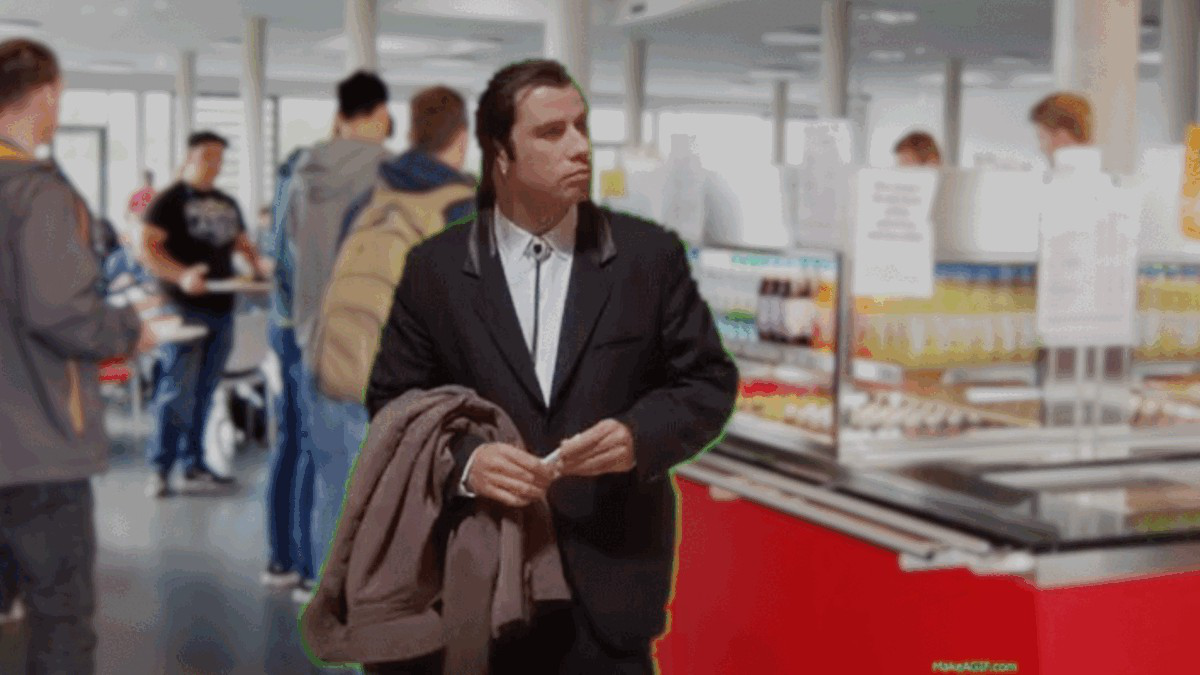

In [136]:
show_image_from_file_id(files.file_id.iloc[-1])